#**The Sparks Foundation GRIP : Data Science and Buisness Analytics**
#**Name : Abdulrahman Khalid**
#**Task 2 : Prediction using Unsupervised ML**
#**Batch : GRIP_SEPTEMBER22**

**Importing Necssary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans

**Importing Datset from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Sparks Tasks/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Data Visualizations**

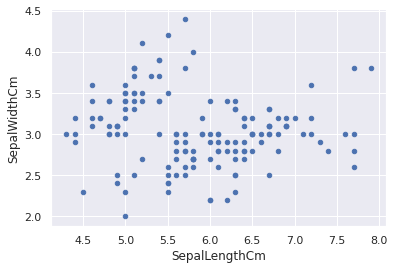

In [ ]:
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm" , )

Adding Species to the Plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


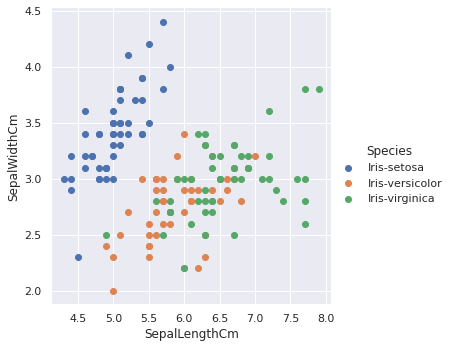

In [ ]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

**Dropping Uncessary Columns**

In [ ]:
data = data.drop(columns=["Species","Id"] , axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Finding the Optimum Number of Clusters for K-Means**

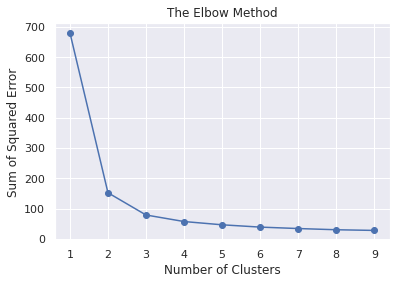

In [ ]:
inertias = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(data)
  inertias.append(km.inertia_)


plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,inertias ,'-o')  

The Optimum Number of Clusters is Where the Elbow occurs.
 
From this we Choose the Number of Clusters as  K = 3.

**Applying K-Means to the Data**

In [ ]:
kmeans = KMeans( n_clusters=3 , random_state=0)

In [ ]:
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [ ]:
y_kmeans = kmeans.predict(data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**Visualising the Clusters**

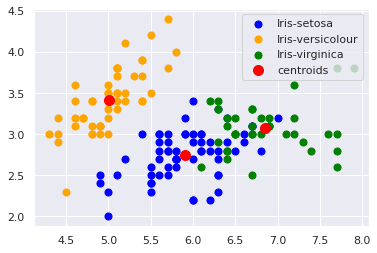

In [ ]:
X = np.array(data)
clusters = np.unique(y_kmeans)

labels = ['Iris-setosa','Iris-versicolour','Iris-virginica']
colors = ["blue","orange","green"]

for i in clusters:
    plt.scatter(X[y_kmeans == i , 0] , X[y_kmeans == i , 1] , label = labels[i] , s = 50 , color = colors[i])

# Plotting the centroids of the clusters    
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:,1] ,label = 'centroids', s = 100, color = 'red')
plt.legend()
plt.show()